In [1]:
import numpy as np
import matplotlib.pyplot as plt

กลยุทธ์ : มีเงิน 1023 บาท เล่นตาละ 1 บาท ถ้าได้กำไร 1 บาท จะเลิกเล่นทันที
-> หา expected value ของกำไร

In [31]:
loss = 0
win = 0
sum_money = 0
n = 1000

for i in range(n):
    money = 1023
    profit = 0
    while profit != 1 and money > 0:
        x = np.random.uniform(0, 1)
        if x <= (18/38):
            profit+=1
            money += 1
        else:
            profit-=1
            money -= 1

    if money == 0:
        loss+=1
    else:
        win+=1
expected_value = (win/n)*(1)+(loss/n)*(-1023)
print(expected_value)

-93.208


Doubling-up (martingale): มีเงิน 1023 บาท เล่นตาละ 1 บาท ถ้าได้กำไร 1 บาท จะเลิกเล่นทันที แต่ถ้าเสีย ตาต่อไปแทงเพิ่มเท่าตัว
-> หา expected value ของกำไร

In [12]:
loss = 0
win = 0
sum_money = 0
n = 100000

for i in range(n):
    money = 1023
    profit = 0
    bet = 1

    while profit != 1 and money > 0:
        x = np.random.uniform(0, 1)
        if x <= (18/38):
            profit += bet
            money += bet
        else:
            profit -= bet
            money -= bet
            bet *= 2

    if money == 0:
        loss += 1
    else:
        win += 1

expected_value = (win/n)*(1) + (loss/n)*(-1023)
print(expected_value)


-0.6588799999999999


เล่นเกมทอยเหรียญที่มีการถ่วงน้ำหนักให้โอกาสออกหัวเป็น 0.6 ในแต่ละตาควรแทงด้วยสัดส่วนเท่าไหร่ของเงินที่มี เพื่อให้ได้กำไรสูงสุด (เล่น 300 ตา จำนวน 1,000 เกม)

[697.631310445347, 5551112.256989265, 1478562.3937076528, 6644933295.429524, 20551.105419190313, 3.612270800096329, 32.57049223350267, 0.14025016205976043, 0.0006421868711426909, 0.0]
6644933295.429524


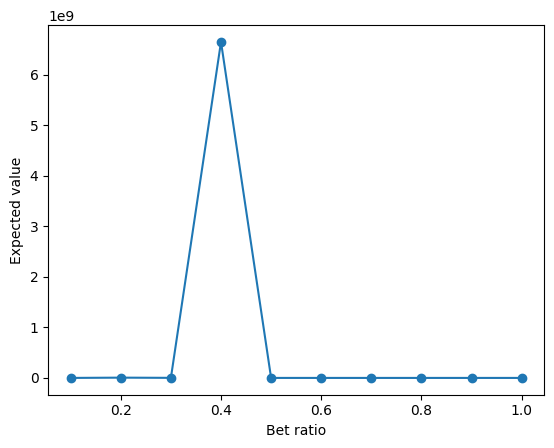

In [26]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
expected_value_x = []

for i in range(len(x)):
    for j in range(1000):
        
        expected_value_list = []
        money = 1

        for k in range(300):
            gambling = np.random.randint(1, 10)
            if gambling <= 6:
                money += money*x[i]
            else:
                money -= money*x[i]
            expected_value_list.append(money)
    expected_value_x.append(np.mean(expected_value_list))
print(expected_value_x)
print(max(expected_value_x))

plt.xlabel("Bet ratio")
plt.ylabel("Expected value")
plt.plot(x, expected_value_x, marker='o')